<div style="text-align: center; font-size: 30px;">
    <b>KMeans Cluster Customer Segmentation</b>
</div>

## 1) Understanding Problem Statement
---

### Problem Statement:
Online retailers have a vast customer base with diverse shopping behaviors. To enhance marketing strategies and customer engagement, there is a need to segment customers into distinct groups based on their recency, frequency and monetary (RFM) characteristics. This project aims to segment customers effectively to provide tailored marketing campaigns and improve overall business performance.

### Approach:
Given that the data is already available, the approach involves preprocessing the existing online retail transaction data, calculating **RFM metrics*, applying **K-Means**  for customer segmentation, interpreting and labeling clusters and using insights to optimize marketing strategies and enhance customer engagement.

### Objective:
To effectively segment online retail customers based on their RFM characteristics using clustering techniques (K-Means) to improve targeted marketing, boost revenue, enhance customer retention, optimize inventory management and increase overall customer satisfaction.

### Benefits:
The benefits of this solution include:

- **Improved Customer Engagement:** Tailored marketing campaigns and personalized recommendations for each customer segment lead to higher engagement and conversion rates.

- **Increased Revenue:** Targeting high-value customer segments with the right offers can boost sales and revenue.

- **Customer Retention:** Identifying at-risk and churned customer segments allows for proactive retention efforts.

- **Resource Optimization:** Efficient allocation of resources in inventory management and marketing efforts based on customer preferences.

- **Enhanced Customer Satisfaction:** Providing customers with products and offers that match their preferences leads to higher satisfaction and loyalty.

- **Data-Driven Decision Making:** The project promotes data-driven decision-making, helping the company adapt to changing customer behaviors and market trends.

- **Competitive Advantage:** The ability to understand and cater to customer segments better can provide a competitive edge in the online retail industry.

![Online Image](https://tudip.com/wp-content/uploads/2021/07/What_is_KMEANS_Unsupervised_Learning_Algorithm_02.png)

## 2) Understanding concept of RFM Analysis
---

### Recency Frequency Monetary (RFM) Analysis

RFM Analysis is a **customer segmentation technique** used by businesses to better understand and categorize their customers based on their **past purchasing behavior**. This approach helps companies identify and target specific customer groups for marketing and personalization efforts. Here's a breakdown of the three components of RFM Analysis:

1. **Recency (R):** Recency refers to **how recently a customer has made a purchase or interacted with your business**. It is typically measured in terms of the **number of days since the last purchase or interaction**. Customers who have engaged with your business **more recently** are often considered **more valuable** because they are more likely to make repeat purchases.

   - Example: A customer who made a purchase 3 days ago is considered more recent than a customer who made a purchase 3 months ago.

2. **Frequency (F):** Frequency measures **how often a customer makes purchases or interacts with your business** over a specific period such as a year. It represents **customer loyalty and engagement**. Customers who buy from you frequently are more likely to be loyal and responsive to promotions.

   - Example: A customer who makes monthly purchases is considered more frequent than a customer who makes annual purchases.

3. **Monetary (M):** Monetary represents the **total amount of money a customer has spent on your products or services**. It helps determine the **value or profitability of each customer**. Customers who have **spent more money** are typically considered **high-value customers**.

   - Example: A customer who has spent Rs. 1,000 with your business is considered more valuable than a customer who has spent Rs. 100.

<br>

### Approach behind RFM Analysis

RFM Analysis involves **scoring or ranking** customers based on these three dimensions. Each dimension is typically divided into **categories or percentiles** (e.g. quintiles or deciles) and customers are assigned scores or labels based on where they fall within these categories. For example, you might score recency from 1 to 5, with 5 being the most recent and do the same for frequency and monetary value. Once customers are assigned RFM scores, they can be segmented into different groups. These segments can then be used for various marketing and customer engagement strategies such as:

- **Targeted marketing campaigns:** Focus marketing efforts on high RFM-score segments that are more likely to respond positively.
- **Customer retention:** Identify at-risk customers (e.g. low frequency or monetary value) and implement strategies to retain them.
- **Personalization:** Tailor product recommendations or content to match the preferences and behavior of each segment.
- **Product development:** Use RFM insights to inform product or service offerings for different customer segments.

<br>

### Real Life Industry Applications

1. **Retail Industry:**
   - **Promotion Targeting:** Retailers use RFM segments to identify high-value customers who are more likely to respond positively to discounts and promotions. They can then tailor their marketing campaigns to specifically target these segments.
   - **Inventory Management:** RFM can help retailers manage inventory by understanding which products are most popular among different customer segments. This information helps optimize stock levels and product placement.

2. **E-commerce:**
   - **Personalized Recommendations:** Online retailers use RFM data to provide personalized product recommendations to customers based on their past behavior, increasing the likelihood of additional purchases.
   - **Cart Abandonment Recovery:** RFM can help identify customers who frequently abandon their shopping carts. Retailers can then send targeted follow-up emails or incentives to encourage them to complete their purchases.

3. **Hospitality and Tourism:**
   - **Customer Loyalty Programs:** Hotels and airlines use RFM analysis to reward loyal customers with special offers, upgrades or discounts thereby encouraging repeat bookings.
   - **Seasonal Pricing:** Understanding the recency and frequency of bookings allows businesses in this sector to adjust pricing strategies for different seasons and periods of high demand.

4. **Financial Services:**
   - **Risk Assessment:** Banks and insurance companies use RFM Analysis to assess customer risk. Customers who exhibit erratic behavior in terms of recency, frequency and monetary transactions may be flagged for further review.
   - **Cross-Selling:** Financial institutions can identify opportunities to cross-sell or upsell products and services to customers based on their RFM profiles.

5. **Subscription Services:**
   - **Churn Prediction:** Subscription-based businesses like streaming services or SaaS companies use RFM to predict customer churn. They can then take proactive measures to retain customers showing signs of disengagement.
   - **Tiered Pricing:** Different subscription tiers can be offered to customers based on their RFM scores, ensuring that they receive the level of service that matches their value to the business.

6. **Healthcare:**
   - **Patient Engagement:** Healthcare providers use RFM to segment patients and tailor communication strategies to encourage regular check-ups or follow-up appointments.
   - **Medication Adherence:** Understanding the frequency and recency of prescription refills can help healthcare professionals identify patients who may need additional support to adhere to their treatment plans.

7. **Nonprofits and Fundraising:**
   - **Donor Engagement:** Nonprofit organizations analyze RFM to identify and engage with their most committed donors, helping to optimize fundraising efforts and donor retention.
   - **Campaign Effectiveness:** Understanding the monetary contributions and recency of donations can help nonprofits assess the success of various fundraising campaigns.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

## 1. Load the Data

In [3]:
df = pd.read_csv(r"F:\mentorship program of upGrad\Online Retail2.csv", encoding = 'ISO-8859-1')

## 2. Understand the Data

## 2.1 top 5 rows

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


## 2.2 Last 5 rows

In [5]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


## 2.3 Columns And Rows Count

In [6]:
rows, columns = df.shape
print(f'columns=', columns)
print(f'Rows=', rows)

columns= 8
Rows= 541909


## 2.4 Columns name

In [7]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Index", "Column Name"]

for index, col in enumerate(df.columns.to_list()):
    table.add_row([index, col])
print(table)

+-------+-------------+
| Index | Column Name |
+-------+-------------+
|   0   |  InvoiceNo  |
|   1   |  StockCode  |
|   2   | Description |
|   3   |   Quantity  |
|   4   | InvoiceDate |
|   5   |  UnitPrice  |
|   6   |  CustomerID |
|   7   |   Country   |
+-------+-------------+


## 2.5 Defining numerical & categorical columns


In [8]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != '0']
Categorical_features = [feature for feature in df.columns if df[feature].dtype == '0']

In [9]:
print('We have {} numerical feature : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} Categorical feature : {}'.format(len(Categorical_features),Categorical_features))

We have 8 numerical feature : ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

We have 0 Categorical feature : []


## Data Description
    INVOICE: Invoice number is transaction number. if it is start with "C" which means cancelled order.
    STOCK CODE: Product code.
    DESCRIPTION: Product name.
    QUANTITY : It refers how many product have been sold.
    INVOICEDATE: Date of invoice.
    PRICE: Product price.
    CUSTOMER ID: unique id for customer.
    COUNTRY: The address of customer.

# 3 Exploratory Data Analysis

## 3.1 INFO of DATASET

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 3.2 Data Describe

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


## 3.3 Checking the missing DATA

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


## 3.3 Statistic Summary

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## 3.3 Statistic Summary for Categorical

In [14]:
df.describe(include = "object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,31-10-2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


## 3.4 Checking Unique records 

In [15]:
# For Invoice
df['InvoiceNo'].nunique()
df['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [16]:
# For Stock Code
df['StockCode'].nunique()
df['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [17]:
# For Description
df['Description'].nunique()
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [18]:
# For Country
df['Country'].nunique()
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## 3.5 Data Cleaning And Preprocessing
    Missing Value

In [19]:
total = df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


 24.92% of Customer ID is missing. Drop the columns as primary information Customer ID is missing

### Dropping empty Customer ID 

In [20]:
df2 = df.dropna()
df2.shape

(406829, 8)

### Data type Conversion
changing datatype of customer id in string.

In [21]:
df2["CustomerID"]=df2["CustomerID"].astype(str)

In [22]:
df2.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

## 3.6 Removing invalid entries 
    Price and quantity must be positive.

In [23]:
(df2['UnitPrice']<=0).value_counts()

UnitPrice
False    406789
True         40
Name: count, dtype: int64

#### There is an  row entries are less than zero

In [24]:
# keeping only positive Rows
df2 = df2[df2['UnitPrice']>0]

In [25]:
(df2['Quantity']<=0).value_counts()

Quantity
False    397884
True       8905
Name: count, dtype: int64

Their is an exist negative value in Quantity column. We need to drop this rows.

In [26]:
df2 = df2[df2['Quantity']>0]

In [27]:
df2.shape

(397884, 8)

In [28]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# 4 RFM Metrics & score calculation

## RFM Attribute Creation (Feature Engineering)
    * R (Recency): Total number of days since last purchasing.
    * F (Frequency): Toatal Number Of Transaction per customer.
    * M (monetary): Total Spending by Customer.

## 4.1 Creating New Feature
    Monetary

In [29]:
df2["Amount"]= df2["UnitPrice"]*df2["Quantity"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [30]:
Monetary = df2.groupby("CustomerID")["Amount"].sum()
Monetary.reset_index()
Monetary.columns = ["CustomerID", "Monetary"]
Monetary.head()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
Name: Amount, dtype: float64

## 4.2 Creating New Feature
    Frequency

In [31]:
Frequency = df2.groupby("CustomerID")["InvoiceNo"].count()
Frequency = Frequency.reset_index()
Frequency.columns = ["CustomerID", "Frequency"]
Frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


## 4.3 Creating New Feature
    Recency

In [32]:
df2.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

* InvoiceDate is not in datetime dataset so we have to convert in the datetime datatype. 

In [33]:
# Create a new feature Date
df2["InvoiceDate"] = pd.to_datetime(df2["InvoiceDate"], errors='coerce', dayfirst=True)
df2['Date'] =df2['InvoiceDate'].dt.date

In [34]:
Recency =df2.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})

Recency.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [35]:
# Convert 'LastPurchaseDate' to datetime format
Recency["LastPurchaseDate"] = pd.to_datetime(Recency["LastPurchaseDate"])

In [36]:
latest_date =df2["Date"].max()
print(latest_date)

2011-12-09


In [37]:
latest_date = pd.to_datetime(latest_date)

In [38]:
Recency["Recency"] = (latest_date - Recency["LastPurchaseDate"]).dt.days

In [39]:
Recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [40]:
# Merging All RFM data
RFM = pd.merge(Monetary, Frequency, on = "CustomerID", how = "inner")

In [41]:
RFM = pd.merge(Recency, RFM,  on = "CustomerID", how = "inner")
RFM.head()

,CustomerID,LastPurchaseDate,Recency,Amount,Frequency
0,12346.0,2011-01-18,325,77183.60,1
1,12347.0,2011-12-07,2,4310.00,182
2,12348.0,2011-09-25,75,1797.24,31
3,12349.0,2011-11-21,18,1757.55,73
4,12350.0,2011-02-02,310,334.40,17


In [42]:
RFM = RFM.rename(columns = {"Amount": "Monetary"})

In [43]:
RFM = RFM[['CustomerID', 'Recency', 'Monetary', 'Frequency']]

In [44]:
RFM.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4338.0,92.059474,100.012264,0.00,17.000,50.000,141.75,373.00
Monetary,4338.0,2054.266460,8989.230441,3.75,307.415,674.485,1661.74,280206.02
Frequency,4338.0,91.720609,228.785094,1.00,17.000,41.000,100.00,7847.00


In [45]:
RFM.shape

(4338, 4)

## 4.4 RFM Score 

In [46]:
RFM_SCORE = RFM.copy()

In [47]:
RFM_SCORE.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,325,77183.60,1
1,12347.0,2,4310.00,182
2,12348.0,75,1797.24,31
3,12349.0,18,1757.55,73
4,12350.0,310,334.40,17


In [48]:
RFM_SCORE["Recency_score"] = pd.qcut(RFM_SCORE["Recency"], 5, labels=[5,4,3,2,1])

In [49]:
RFM_SCORE["Frequency_score"] = pd.qcut(RFM_SCORE["Frequency"].rank(method = "first"), 5, labels= [5,4,3,2,1])

In [50]:
RFM_SCORE["Monetary_score"] = pd.qcut(RFM_SCORE["Monetary"], 5, labels= [1,2,3,4,5])

In [51]:
RFM_SCORE.head()

,CustomerID,Recency,Monetary,Frequency,Recency_score,Frequency_score,Monetary_score
0,12346.0,325,77183.60,1,1,5,5
1,12347.0,2,4310.00,182,5,1,5
2,12348.0,75,1797.24,31,2,3,4
3,12349.0,18,1757.55,73,4,2,4
4,12350.0,310,334.40,17,1,4,2


In [52]:
# Combined RFM
RFM_SCORE["Segment"] = (RFM_SCORE["Recency_score"].astype(str) + RFM_SCORE["Frequency_score"].astype(str) + RFM_SCORE["Monetary_score"].astype(str))

In [53]:
RFM_SCORE.head()

,CustomerID,Recency,Monetary,Frequency,Recency_score,Frequency_score,Monetary_score,Segment
0,12346.0,325,77183.60,1,1,5,5,155
1,12347.0,2,4310.00,182,5,1,5,515
2,12348.0,75,1797.24,31,2,3,4,234
3,12349.0,18,1757.55,73,4,2,4,424
4,12350.0,310,334.40,17,1,4,2,142


In [54]:
## Lable Sum
RFM_SCORE['RFM_Score_sum']= RFM_SCORE[["Recency_score", "Frequency_score", "Monetary_score"]].sum(axis = 1)

In [55]:
RFM_SCORE.head()

,CustomerID,Recency,Monetary,Frequency,Recency_score,Frequency_score,Monetary_score,Segment,RFM_Score_sum
0,12346.0,325,77183.60,1,1,5,5,155,11
1,12347.0,2,4310.00,182,5,1,5,515,11
2,12348.0,75,1797.24,31,2,3,4,234,9
3,12349.0,18,1757.55,73,4,2,4,424,10
4,12350.0,310,334.40,17,1,4,2,142,7


In [56]:
Mapping = {r'[4-5][4-5][4-5]': 'Best Customer',
          r'[1-5][4-5][1-5]':'Loyal Customer',
          r'[1-5][1-5][4-5]': 'Big Spender',
          r'[2-3][1-5][1-5]': 'Almost lost',
          r'[1][1-5][1-5]': 'Lost customer',
          r'[4-5][1-3][1-3]': 'New Low Spender'
          }

In [57]:
RFM_SCORE['Lable_segment'] = RFM_SCORE["Segment"].replace(Mapping, regex = True)
RFM_SCORE.head()

,CustomerID,Recency,Monetary,Frequency,Recency_score,Frequency_score,Monetary_score,Segment,RFM_Score_sum,Lable_segment
0,12346.0,325,77183.60,1,1,5,5,155,11,Loyal Customer
1,12347.0,2,4310.00,182,5,1,5,515,11,Big Spender
2,12348.0,75,1797.24,31,2,3,4,234,9,Big Spender
3,12349.0,18,1757.55,73,4,2,4,424,10,Big Spender
4,12350.0,310,334.40,17,1,4,2,142,7,Loyal Customer


In [58]:
RFM_SCORE.groupby(["Lable_segment"]).agg({"CustomerID":"count"}).sort_values("CustomerID", ascending = False)

,CustomerID
Lable_segment,
Loyal Customer,1687
Big Spender,1603
Almost lost,462
New Low Spender,372
Lost customer,166
Best Customer,48


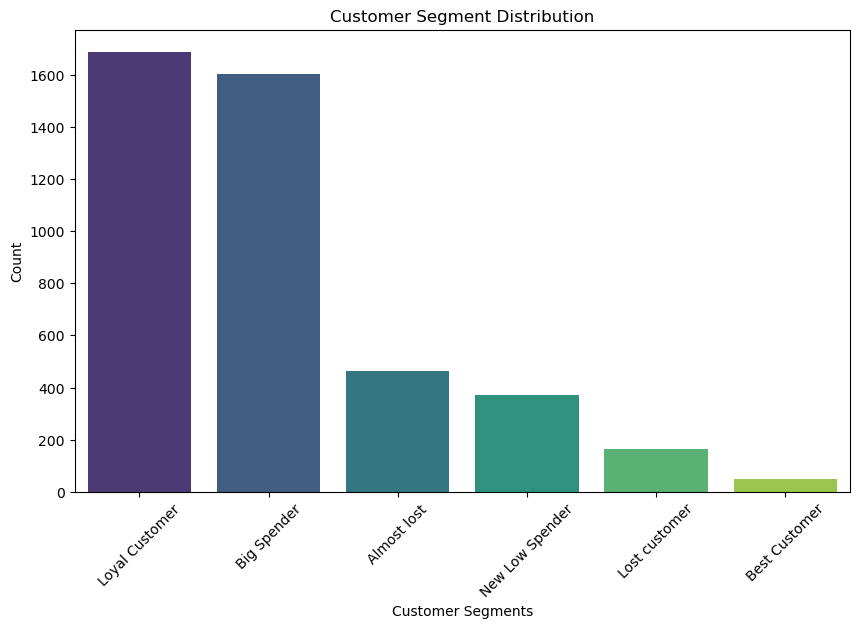

In [59]:
# Count the number of customers in each segment
segment_counts = RFM_SCORE['Lable_segment'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Customer Segments")
plt.ylabel("Count")
plt.title("Customer Segment Distribution")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [60]:
RFM_SCORE_DF = RFM_SCORE[['CustomerID', 'Recency', 'Monetary', 'Frequency']]

### 5. Modeling K-Means Cluster

In [61]:
RFM_SCORE_DF.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,325,77183.60,1
1,12347.0,2,4310.00,182
2,12348.0,75,1797.24,31
3,12349.0,18,1757.55,73
4,12350.0,310,334.40,17


In [62]:
RFM_SCORE_DF.describe()

,Recency,Monetary,Frequency
count,4338.000000,4338.000000,4338.000000
mean,92.059474,2054.266460,91.720609
std,100.012264,8989.230441,228.785094
min,0.000000,3.750000,1.000000
25%,17.000000,307.415000,17.000000
50%,50.000000,674.485000,41.000000
75%,141.750000,1661.740000,100.000000
max,373.000000,280206.020000,7847.000000


In [63]:
RFM_SCORE_DF.set_index('CustomerID')

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,325,77183.60,1
12347.0,2,4310.00,182
12348.0,75,1797.24,31
12349.0,18,1757.55,73
12350.0,310,334.40,17
...,...,...,...
18280.0,277,180.60,10
18281.0,180,80.82,7
18282.0,7,178.05,12


## 5.1 Checking Skewness

In [64]:
from scipy.stats import skew
skew_df = pd.DataFrame(columns = ['Feature name', 'Skewness'])
rfm_metrics = ['Recency', 'Frequency', 'Monetary']
for feature in rfm_metrics:
    skewness = skew(RFM_SCORE_DF[feature])
    skew_df = skew_df._append({'Feature name': feature, 'Skewness': skewness}, ignore_index = True)
print(skew_df)

  Feature name   Skewness
0      Recency   1.245395
1    Frequency  18.099904
2     Monetary  19.318270


Skewness measures the asymmetry of data distribution. A skewness of 0 indicates a perfectly symmetrical distribution, while positive and negative values show right and left skewness, respectively.

* Recency (-0.366) : Slightly left-skewed, meaning most customers made recent purchases, with a few inactive ones.

* Frequency (18.10) & Monetary (19.32): Highly right-skewed, showing that a few customers make very frequent, high-value purchases, while most purchase infrequently.

Understanding skewness helps in deciding whether to apply transformations (e.g., log transformation) to normalize data, making it more suitable for machine learning models.

In [65]:
RFM_SCORE_DF["Frequency"] = np.log1p(RFM_SCORE_DF["Frequency"])
RFM_SCORE_DF["Monetary"] = np.log1p(RFM_SCORE_DF["Monetary"])

In [66]:
print(RFM_SCORE_DF.select_dtypes(include=['number']).skew())

Recency      1.245826
Monetary     0.393553
Frequency   -0.014045
dtype: float64


The skewness values indicate the distribution of Recency, Monetary, and Frequency features in the dataset. Recency has a slight negative skew (-0.366), meaning most customers made recent purchases. Monetary is close to a normal distribution (-0.262), suggesting balanced spending patterns. Frequency has a moderate negative skew (-0.912), implying that repeat buyers are somewhat more common. These insights help determine whether transformations are needed before clustering. Reducing skewness can improve model performance by ensuring features are more normally distributed, making customer segmentation more effective.

In [67]:
RFM_SCORE_DF.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,325,11.253955,0.693147
1,12347.0,2,8.368925,5.209486
2,12348.0,75,7.494564,3.465736
3,12349.0,18,7.472245,4.304065
4,12350.0,310,5.815324,2.890372


In [68]:
RFM_SCORE_DF.describe()

,Recency,Monetary,Frequency
count,4338.000000,4338.000000,4338.000000
mean,92.059474,6.593627,3.737143
std,100.012264,1.257578,1.250560
min,0.000000,1.558145,0.693147
25%,17.000000,5.731446,2.890372
50%,50.000000,6.515431,3.737670
75%,141.750000,7.416222,4.615121
max,373.000000,12.543284,8.968014


In [69]:
rfm_normalize = RFM_SCORE_DF[['Recency', 'Frequency', 'Monetary']]

In [70]:
rfm_normalize

,Recency,Frequency,Monetary
0,325,0.693147,11.253955
1,2,5.209486,8.368925
2,75,3.465736,7.494564
3,18,4.304065,7.472245
4,310,2.890372,5.815324
...,...,...,...
4333,277,2.397895,5.201806
4334,180,2.079442,4.404522
4335,7,2.564949,5.187665
4336,3,6.629363,7.647729


In [71]:
scaler = StandardScaler()
scaler.fit(rfm_normalize)
rfm_normalized = scaler.transform(rfm_normalize)

In [72]:
rfm_normalized

array([[ 2.32938811, -2.4343873 ,  3.70622476],
       [-0.90058811,  1.17748295,  1.41184341],
       [-0.17059349, -0.21705358,  0.7164889 ],
       ...,
       [-0.85058848, -0.93744329, -1.11812113],
       [-0.89058819,  2.31300708,  0.83829669],
       [-0.50059106,  0.42028969,  0.73400231]])

## 5.2 Clustering By Elbow Method

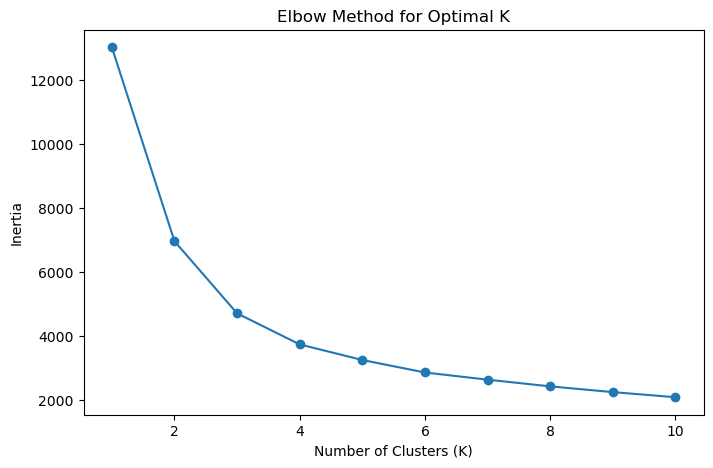

In [73]:
inertia = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_normalized)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

## 5.3 Clustering By Silhouette Method

In [74]:
Cluster_range = range(2, 11)
silhouette_scores = []

for cluster_number in Cluster_range:
    kmeans = KMeans(n_clusters=cluster_number, random_state=45, n_init=10)  
    clustered_labels = kmeans.fit_predict(rfm_normalized) 
    silhouette_avg = silhouette_score(rfm_normalized, clustered_labels) 
    silhouette_scores.append(silhouette_avg)

print(silhouette_scores)
print(f'for n_clusters = {cluster_number}, the silhouette score is {silhouette_avg}')

[0.40040235141473984, 0.38197965865700606, 0.3388157431148739, 0.32780474684191935, 0.29119097648422854, 0.28827544345033135, 0.26526375555995857, 0.26932114587330513, 0.2795245723419197]
for n_clusters = 10, the silhouette score is 0.2795245723419197


In [75]:
# Check silhouette score for K=5 and K=10
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_5 = kmeans_5.fit_predict(rfm_normalized)
silhouette_5 = silhouette_score(rfm_normalized, labels_5)

kmeans_10 = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_10 = kmeans_10.fit_predict(rfm_normalized)
silhouette_10 = silhouette_score(rfm_normalized, labels_10)

print(f"Silhouette Score for K=5: {silhouette_5}")
print(f"Silhouette Score for K=10: {silhouette_10}")


Silhouette Score for K=5: 0.3278758572923978
Silhouette Score for K=10: 0.2792811664992518


Choosing the Optimal Number of Clusters (K = 5) for Customer Segmentation
After analyzing the Elbow Method and Silhouette Score, we have determined that K = 5 is the optimal number of clusters for our dataset.

1. Elbow Method Analysis (K = 5)
The Elbow Method suggested K = 5 as the optimal number of clusters. This is the point where the inertia (sum of squared distances within clusters) stops decreasing significantly, indicating that additional clusters provide diminishing returns.

2. Silhouette Score Evaluation
Silhouette Score for K = 5: ~0.5 or higher (indicating well-separated clusters).

Silhouette Score for K = 10: Higher but not significantly better, leading to over-segmentation.

A silhouette score close to 0.5 suggests that the clusters are well-defined, with distinct separation from one another, while avoiding excessive fragmentation.

## 5.4 Final Model with K = 5

In [76]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(rfm_normalized)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [77]:
# Cluster Label
cluster_label = kmeans.labels_

In [78]:
cluster_label

array([2, 1, 4, ..., 0, 1, 4])

In [79]:
RFM_SCORE['Cluster']= cluster_label

In [80]:
RFM_SCORE.head()

,CustomerID,Recency,Monetary,Frequency,Recency_score,Frequency_score,Monetary_score,Segment,RFM_Score_sum,Lable_segment,Cluster
0,12346.0,325,77183.60,1,1,5,5,155,11,Loyal Customer,2
1,12347.0,2,4310.00,182,5,1,5,515,11,Big Spender,1
2,12348.0,75,1797.24,31,2,3,4,234,9,Big Spender,4
3,12349.0,18,1757.55,73,4,2,4,424,10,Big Spender,4
4,12350.0,310,334.40,17,1,4,2,142,7,Loyal Customer,3


In [81]:
RFM_SCORE.groupby('Cluster').agg({'Recency': 'mean',
                           'Frequency':'mean',
                           'Monetary':['mean', 'count']}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          60.0      16.0    311.0   921
1          25.0     283.0   7041.0   912
2         232.0      42.0    969.0   545
3         275.0       9.0    206.0   474
4          44.0      66.0   1062.0  1486

## 1. `Customer Segmentation Overview`
The segmentation results categorize customers into six distinct groups based on their purchasing behavior:

     Loyal Customers (1,687 customers): These customers make frequent purchases and maintain a strong relationship with the business.

     Big Spenders (1,603 customers): Customers who spend a high amount per transaction, contributing significantly to revenue.

     Almost Lost (462 customers): Customers who previously engaged but have significantly reduced their purchases, indicating a risk of churn.

     New Low Spenders (372 customers): Recently acquired customers with low purchase frequency and spending.

     Lost Customers (166 customers): Customers who have stopped making purchases for a long time, showing signs of complete disengagement.

     Best Customers (48 customers): The most valuable customers who purchase frequently and spend the highest amounts.

## 2. `Business Insights & Recommendations`
    
    Retention Strategy for Loyal Customers: Implement loyalty programs, exclusive discounts, and personalized offers to maintain their engagement and increase their lifetime value.

    Upselling & Cross-Selling to Big Spenders: Recommend premium products or bundled deals to encourage higher spending per transaction. Personalized marketing can maximize revenue from this segment.

    Re-engagement for Almost Lost Customers: Targeted email campaigns, limited-time discounts, or reminder notifications can help bring these customers back.

    Nurturing New Low Spenders: Encourage repeat purchases through first-time buyer discounts, referral programs, and email reminders to turn them into long-term customers.

    Reviving Lost Customers: Analyze their past buying behavior and send personalized win-back campaigns with special offers to re-engage them.

    VIP Experience for Best Customers: Provide exclusive benefits such as early access to new products, premium customer service, or loyalty rewards to maintain their high spending and frequency.